# Deutsch's Algorithm

In [101]:
from qiskit import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [86]:
def deutch_algo(qcirc):
    backend = BasicAer.get_backend('dm_simulator')
    # Noise parameters
    options = {}
    options_noisy = {
        "thermal_factor": 0.,
        "decoherence_factor": .9,
        "depolarization_factor": 0.99,
        "bell_depolarization_factor": 0.99,
        "decay_factor": 0.99,
        "rotation_error": {'rx':[1., 0.], 'ry':[1., 0.], 'rz': [1., 0.]},
        "tsp_model_error": [1., 0.],
        "plot": False
    }
    # Execution with and without noise
    run = execute(qcirc,backend,**options)
    result = run.result()
    run_error = execute(qcirc,backend,**options_noisy)
    result_error = run_error.result()
    # Final state (probabilities)
    prob = result['results'][0]['data']['ensemble_probability']
    prob_error = result_error['results'][0]['data']['ensemble_probability']

    proj_prob = {}
    proj_prob_error = {}

    proj_prob['0'] = prob['00'] +prob['01']
    proj_prob['1'] = prob['10'] +prob['11']
    proj_prob_error['0'] = prob_error['00'] +prob_error['01']
    proj_prob_error['1'] = prob_error['10'] +prob_error['11']

    labels = proj_prob.keys()
    without_noise = proj_prob.values()
    with_noise = proj_prob_error.values()

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
    rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probability')
    ax.set_title('Ensemble Probabilities with Noise')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

## Deutsch Algorithm for 1-bit Boolean functions

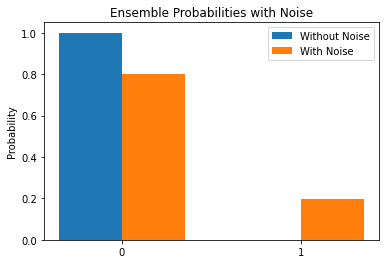

In [97]:
f0_qc = QuantumCircuit(2,1)
# Prepare ancilla for phase oracle
f0_qc.x(1)
f0_qc.h(1)
# Hadamard before
f0_qc.h(0)
# Add the oracle
f0_qc.barrier()
f0_qc.barrier()
# Hadamard after
f0_qc.h(0)
f0_qc.measure(0,0,basis='Ensemble', add_param='Z')

deutch_algo(f0_qc)

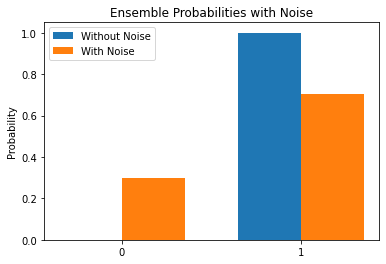

In [98]:
f1_qc = QuantumCircuit(2,1)
# Prepare ancilla for phase oracle
f1_qc.x(1)
f1_qc.h(1)
# Hadamard before
f1_qc.h(0)
# Add the oracle
f1_qc.barrier()
f1_qc.cx(0,1)
f1_qc.barrier()
# Hadamard after
f1_qc.h(0)
f1_qc.measure(0,0,basis='Ensemble', add_param='Z')

deutch_algo(f1_qc)

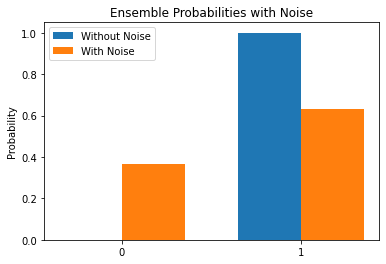

In [99]:
f2_qc = QuantumCircuit(2,1)
# Prepare ancilla for phase oracle
f2_qc.x(1)
f2_qc.h(1)
# Hadamard before
f2_qc.h(0)
# Add the oracle
f2_qc.barrier()
f2_qc.x(0)
f2_qc.cx(0,1)
f2_qc.barrier()
# Hadamard after
f2_qc.h(0)
f2_qc.measure(0,0,basis='Ensemble', add_param='Z')

deutch_algo(f2_qc)

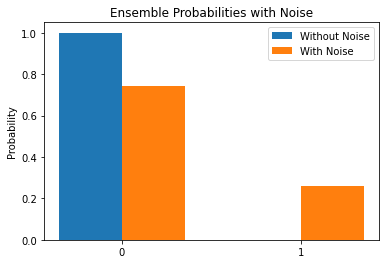

In [100]:
f3_qc = QuantumCircuit(2,1)
# Prepare ancilla for phase oracle
f3_qc.x(1)
f3_qc.h(1)
# Hadamard before
f3_qc.h(0)
# Add the oracle
f3_qc.barrier()
f3_qc.x(1)
f3_qc.barrier()
# Hadamard after
f3_qc.h(0)
f3_qc.measure(0,0,basis='Ensemble', add_param='Z')

deutch_algo(f3_qc)